# Notebook 03: Volatility Clustering and ARCH Effects

**Objective:**  
- Examine volatility clustering in returns  
- Provide statistical evidence of conditional heteroskedasticity  
- Justify the use of ARCH/GARCH models  

**Asset:** NIFTY 50 Index  
**Frequency:** Daily  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
import yfinance as yf

In [ ]:
ticker = "^NSEI"

df = yf.download(
    ticker,
    start="2015-01-01",
    end="2024-12-31",
    progress=False
)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df[["Close"]].rename(columns={"Close": "Price"})
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
returns = df["log_return"].dropna()

/tmp/ipython-input-452387832.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(


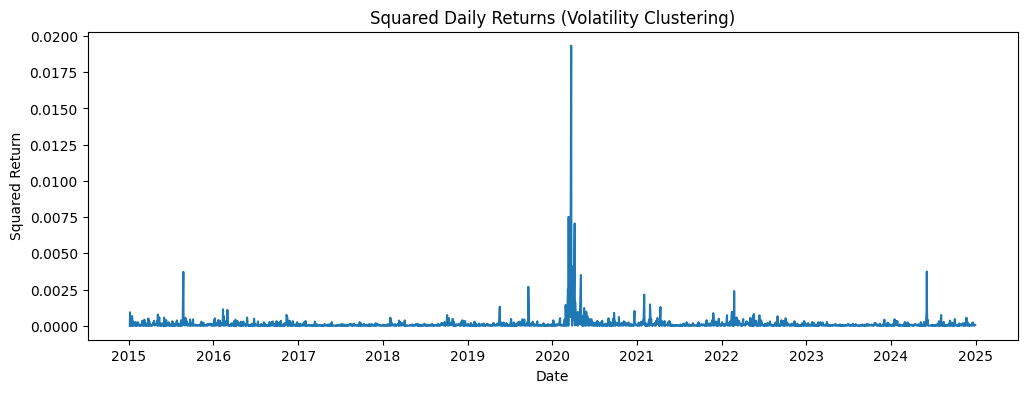

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(returns**2)
plt.title("Squared Daily Returns (Volatility Clustering)")
plt.xlabel("Date")
plt.ylabel("Squared Return")
plt.show()

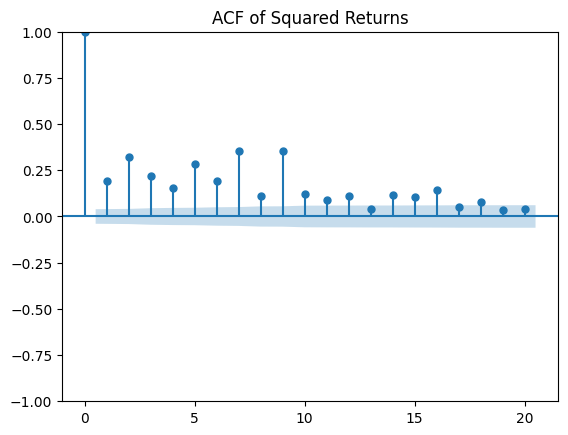

In [ ]:
plot_acf(returns**2, lags=20)
plt.title("ACF of Squared Returns")
plt.show()

In [ ]:
lb_sq = acorr_ljungbox(returns**2, lags=[10, 20], return_df=True)
lb_sq

,lb_stat,lb_pvalue
10,1507.187799,0.0
20,1703.833087,0.0


In [ ]:
arch_test = het_arch(returns)
arch_test

(np.float64(638.7963540851392),
 np.float64(8.505670868667209e-131),
 86.05822259384321,
 4.054920987090893e-152)

### Interpretation

Squared returns exhibit strong autocorrelation and significant Ljung–Box test
statistics, indicating volatility clustering. Engle’s ARCH LM test strongly
rejects the null hypothesis of homoskedasticity. Together, these results provide
clear evidence of conditional heteroskedasticity in returns, justifying the use
of ARCH/GARCH models for volatility modelling.